## 1. 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


변수 정보

* fixed acidity 산도

* volatile acidity 휘발성산

* citric acid 시트르산

* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

* chlorides 염화물

* free sulfur dioxide 독립 이산화황

* total sulfur dioxide 총 이산화황

* density 밀도

* pH 수소이온농도

* sulphates 황산염

* alcohol 도수

* type 종류



In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


* 5497개 데이터, 결측치 없음

## 2. EDA

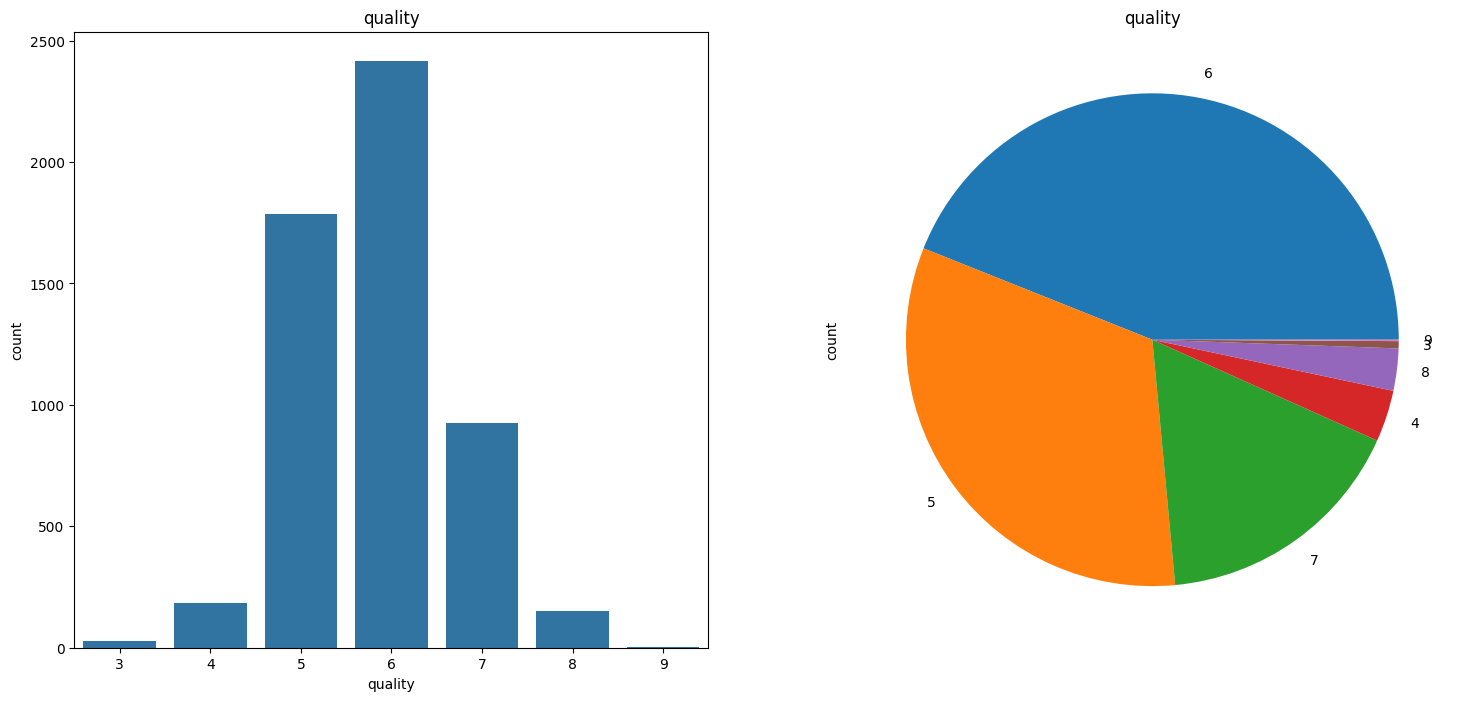

In [7]:
# 품질 분포 확인

f,ax=plt.subplots(1,2,figsize=(18,8))
train['quality'].value_counts().plot.pie(ax=ax[1])
ax[0].set_title('quality')
ax[0].set_ylabel('')
sns.countplot(x='quality',data=train,ax=ax[0])
ax[1].set_title('quality')
plt.show()

<ipython-input-13-8f377fb19c0d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:,i])
<ipython-input-13-8f377fb19c0d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:,i])
<ipython-input-13-8f377fb19c0d>:6: UserWarning: 

`distplot` is a deprecated function and will be re

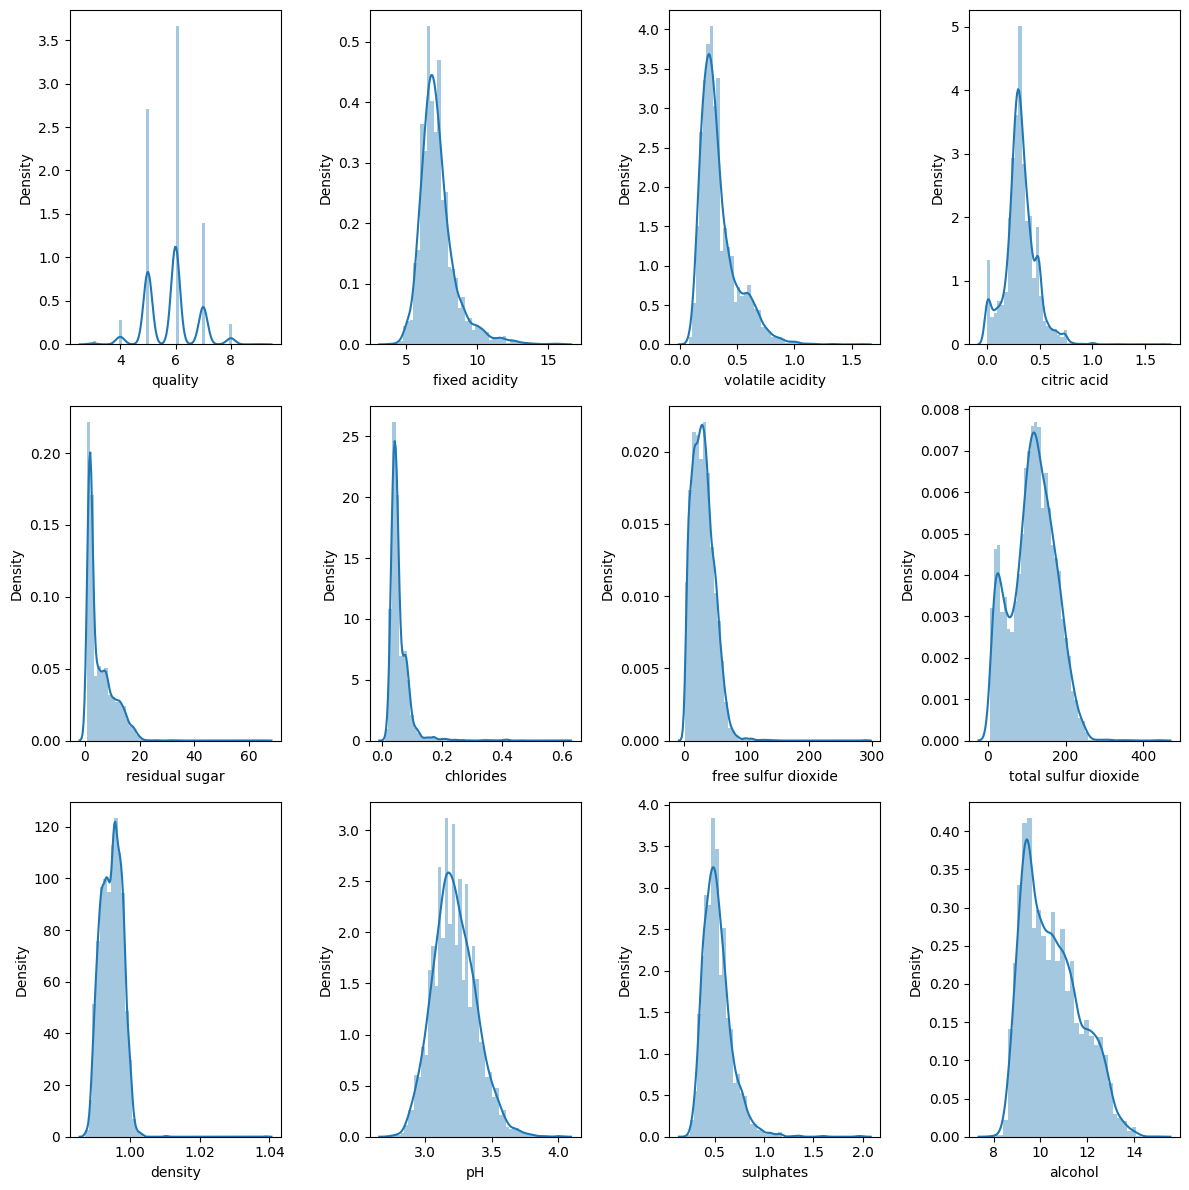

In [13]:
# 각 변수별 분포

plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

<Axes: >

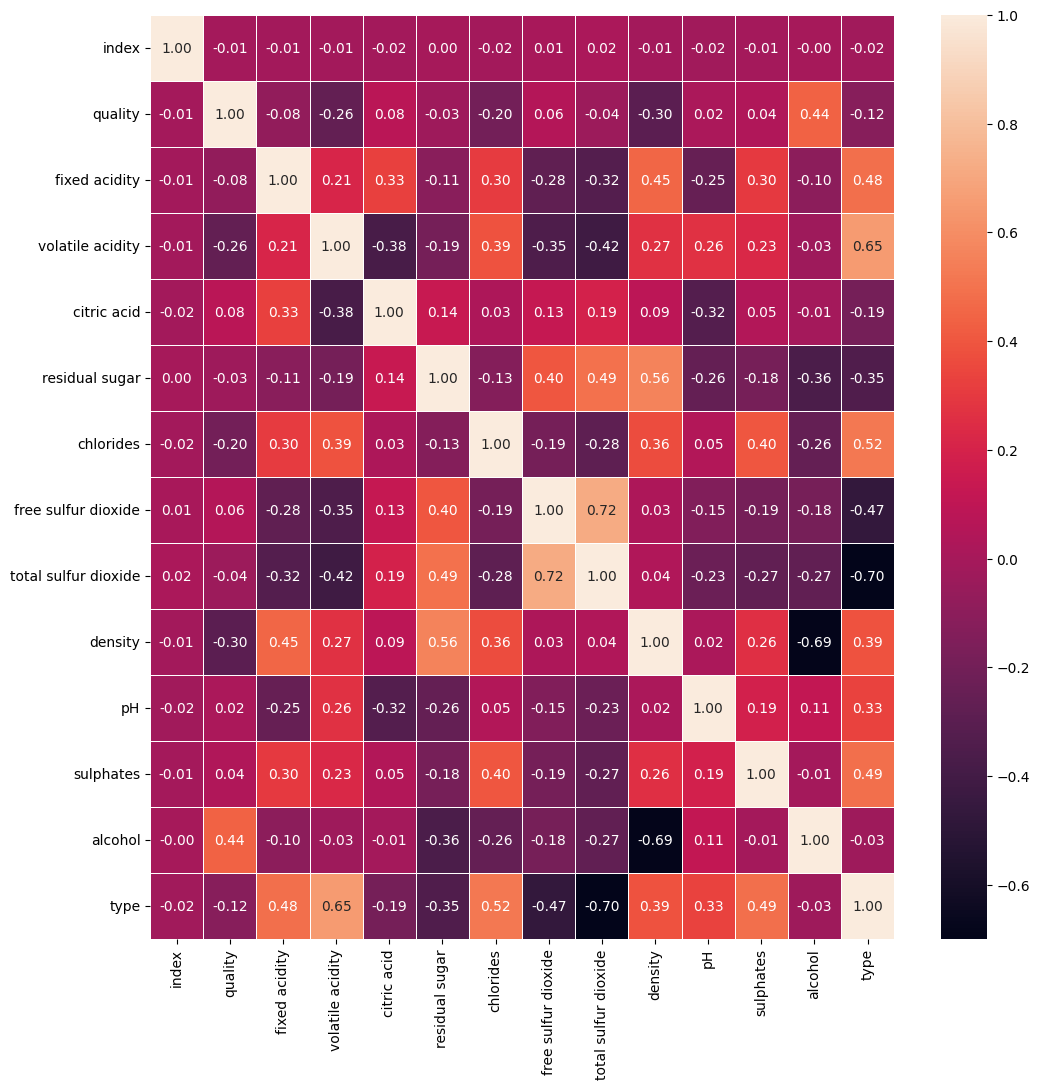

In [11]:
# 피처 간 상관관계 파악

plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5)

밀도와 도수 사이에 강한 음의 상관관계

총 이산화황과 와인종류 사이에 강한 음의 상관관계





* alcohol 에 따른 품질

In [ ]:
train['alcohol'].describe()

,alcohol
count,5497.000000
mean,10.504918
std,1.194524
min,8.000000
25%,9.500000
50%,10.300000
75%,11.300000
max,14.900000


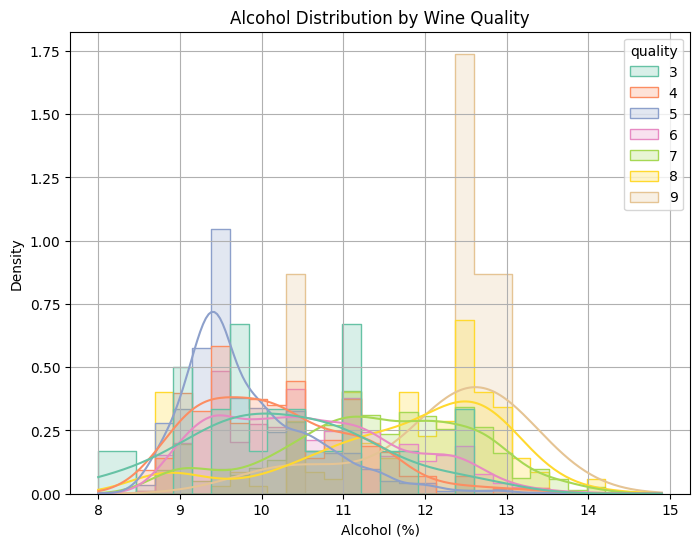

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='alcohol', hue='quality', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Alcohol Distribution by Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

* density 에 따른 품질

In [ ]:
train['density'].describe()

,density
count,5497.000000
mean,0.994673
std,0.003014
min,0.987110
25%,0.992300
50%,0.994800
75%,0.996930
max,1.038980


대부분이 1이하. 오른쪽으로 긴 꼬리

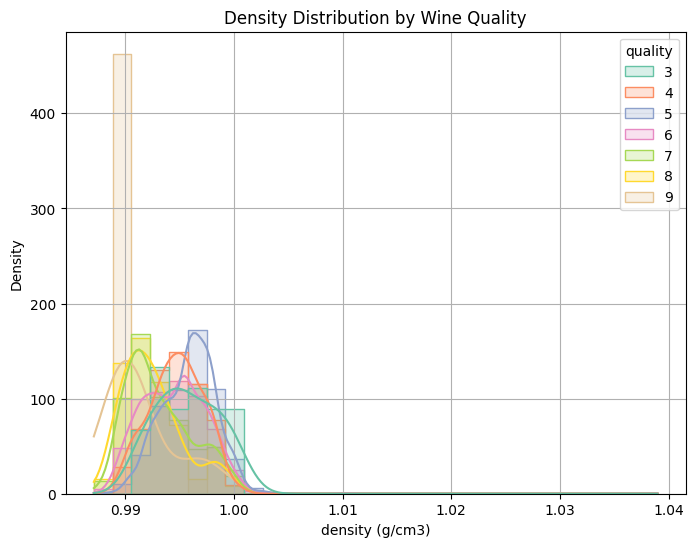

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='density', hue='quality', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Density Distribution by Wine Quality')
plt.xlabel('density (g/cm3)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

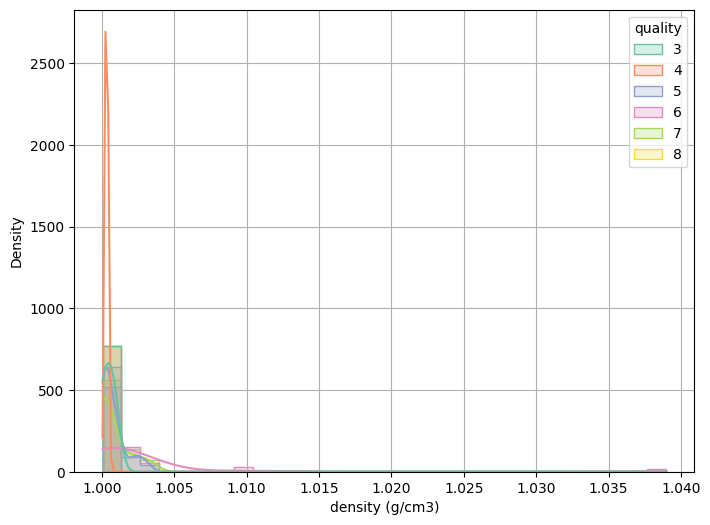

In [20]:
train_density_high=train[train['density'] > 1]

plt.figure(figsize=(8, 6))
sns.histplot(data=train_density_high, x='density', hue='quality', kde=True, bins=30, palette='Set2', element='step', stat='density', common_norm=False)
plt.xlabel('density (g/cm3)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## 3. Feature Engineering and Data Cleaning

In [26]:
# type 피처 >> numeric 변환

train['type'].replace({'white': 0, 'red': 1}, inplace=True)
test['type'].replace({'white': 0, 'red': 1}, inplace=True)

<ipython-input-26-4df64b140c14>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['type'].replace({'white': 0, 'red': 1}, inplace=True)
<ipython-input-26-4df64b140c14>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['type'].replace({'white': 0, 'red': 1}, inplace=True)
<ipython-input-26-

In [27]:
# 불필요한 피처 제거
train.drop(['index'], axis=1, inplace=True)
test.drop(['index'], axis=1,inplace=True)

## 4. 모델링

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [28]:
X = train.drop(['quality'], axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [29]:
# 정규화

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# RF

model=RandomForestClassifier()
model.fit(X_train, y_train)
prediction1=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the Random Forests is 0.69


In [33]:
# 결정 트리

model=DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction2=model.predict(X_test)
print('The accuracy of the DecisionTree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the DecisionTree is 0.6072727272727273


In [37]:
# 로지스틱회귀

model=LogisticRegression()
model.fit(X_train, y_train)
prediction3=model.predict(X_test)
print('The accuracy of the LogisticRegression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the LogisticRegression is 0.4954545454545455


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 라쏘 회귀, 랜덤포레스트 회귀 수행

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [39]:
# 1. Lasso 회귀
lasso = Lasso(alpha=1.0, random_state=156)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 2. 랜덤 포레스트 회귀
rf = RandomForestRegressor(n_estimators=100, random_state=156)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [40]:
print("Lasso 회귀:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.3f}")
print(f" - R²: {r2_score(y_test, y_pred_lasso):.3f}\n")

print("랜덤 포레스트 회귀:")
print(f" - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")
print(f" - R²: {r2_score(y_test, y_pred_rf):.3f}")

Lasso 회귀:
 - RMSE: 0.859
 - R²: 0.001

랜덤 포레스트 회귀:
 - RMSE: 0.623
 - R²: 0.474


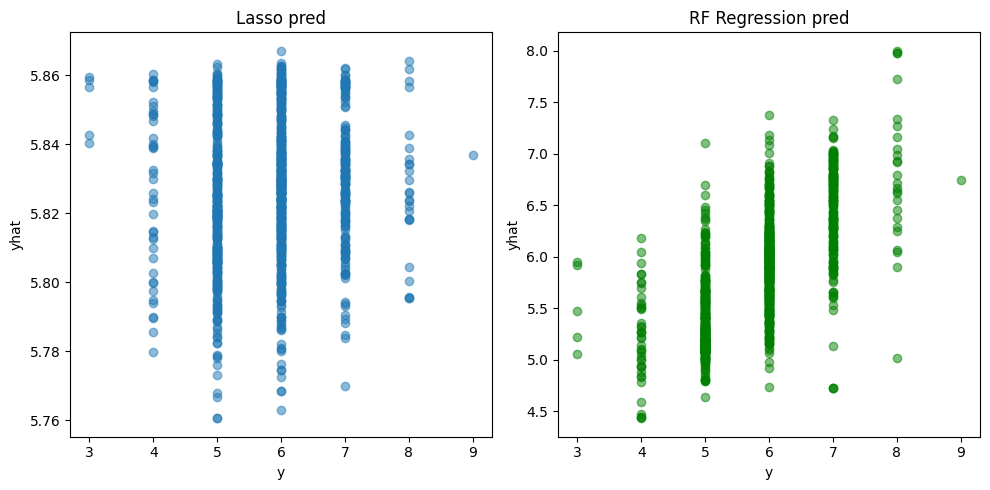

In [42]:
# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title("Lasso pred")
plt.xlabel("y")
plt.ylabel("yhat")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.title("RF Regression pred")
plt.xlabel("y")
plt.ylabel("yhat")
plt.tight_layout()
plt.show()